In [2]:
from keras.utils import np_utils
import numpy as np
import pandas as pd
np.random.seed(10)

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [8]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)=mnist.load_data()

In [9]:
print('train data=',len(x_train_image))
print(' test data=',len(x_test_image))

train data= 60000
 test data= 10000


In [10]:
print('x_train_image:',x_train_image.shape)
print('y_train_label',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label (60000,)


In [11]:
import matplotlib.pyplot as plt

In [12]:
def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

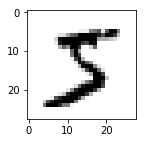

In [13]:
plot_image(x_train_image[0])

In [14]:
y_train_label[0]

5

In [15]:
import matplotlib.pyplot as plt

In [37]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

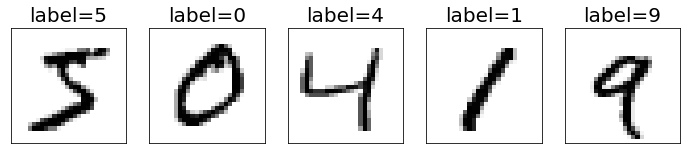

In [38]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,5)

In [39]:
print('x_test_image:',x_test_image.shape)
print('y_test_label:',y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


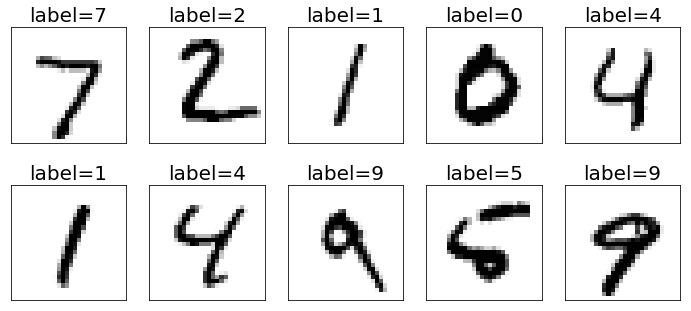

In [40]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

In [41]:
print('x_train_image:',x_train_image.shape)
print('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [43]:
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

In [44]:
print('x_train:',x_Train.shape)
print('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [45]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [46]:
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

In [47]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [49]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [55]:
y_TrainOneHot=np_utils.to_categorical(y_train_label)
y_TestOneHot=np_utils.to_categorical(y_test_label)

In [56]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)